# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



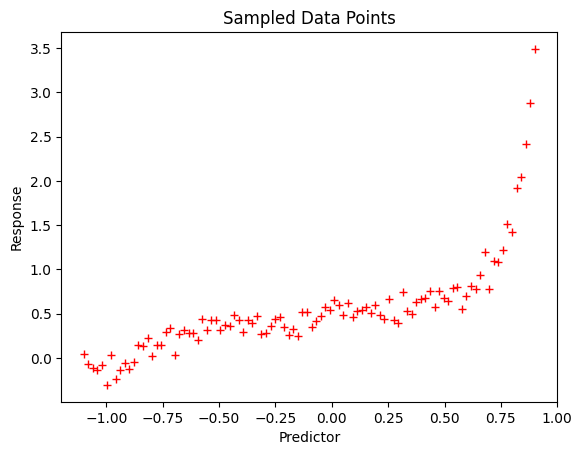

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y , coeff

predictor, response, origCoeffs = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

# PART 1
## 1.

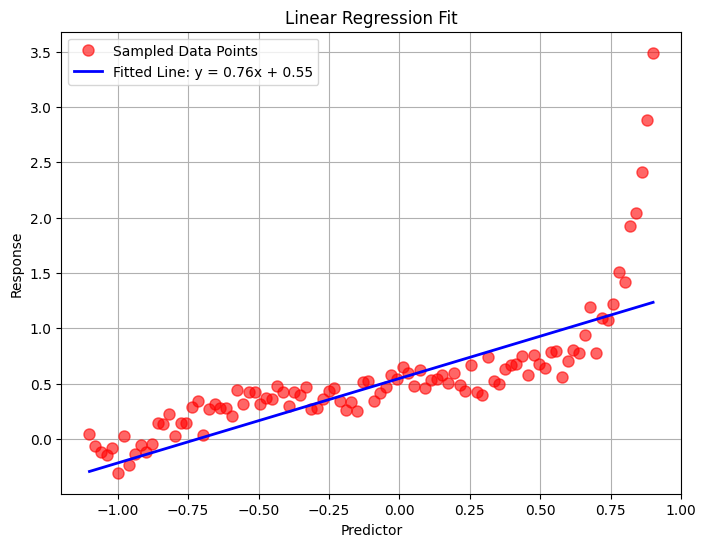

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_regression_coefficients(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sum_xy_deviation = 0
    sum_x_deviation_sq = 0
    sum_xy_deviation,sum_x_deviation_sq  = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y)),sum((xi - mean_x)**2 for xi in x)



    beta1 = 0
    beta0 = 0
    beta1, beta0 = sum_xy_deviation / sum_x_deviation_sq, mean_y - beta1 * mean_x

    return beta0, beta1


def plot_regression_line(predictor, response, beta0, beta1):
    plt.figure(figsize=(8, 6))


    data_color = 'ro'
    line_color = 'b-'
    line_width = 2
    marker_size = 8
    marker_alpha = 0.6

    data_label = 'Sampled Data Points'
    line_label = f'Fitted Line: y = {beta1:.2f}x + {beta0:.2f}'

    plt.plot(predictor, response, data_color, label=data_label, markersize=marker_size, alpha=marker_alpha)
    plt.plot(predictor, beta1 * predictor + beta0, line_color, label=line_label, linewidth=line_width)

    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

beta0, beta1 = calculate_regression_coefficients(predictor, response)
plot_regression_line(predictor, response, beta0, beta1)


2.

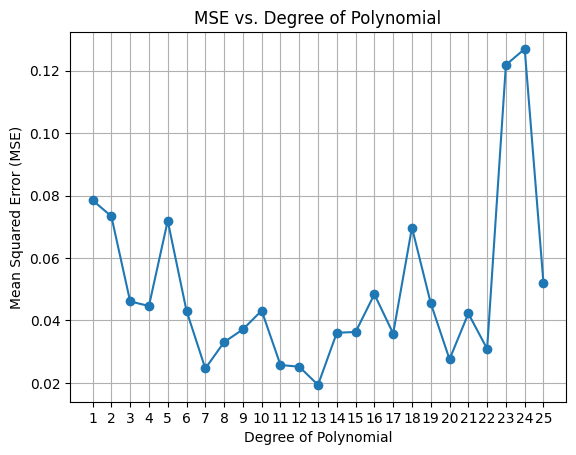

Best Degree: 13
Best MSE: 0.019341884781068432


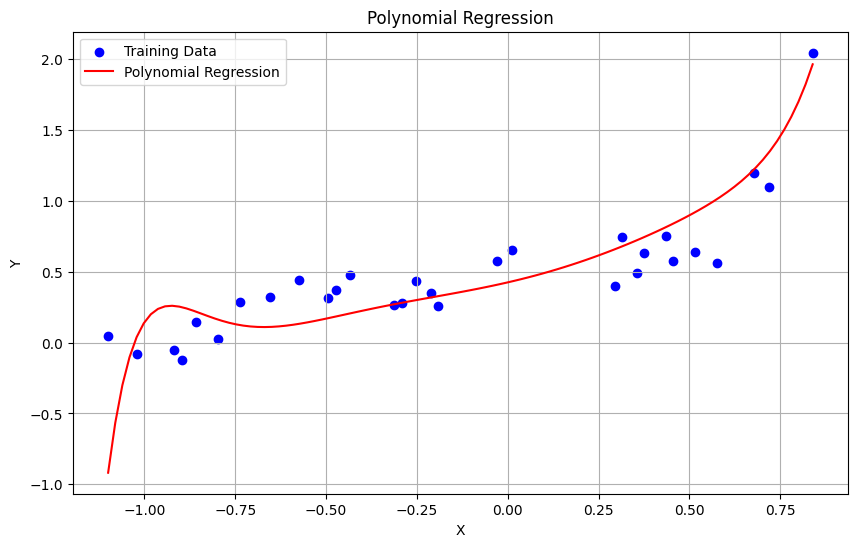

(26,)
(26,)


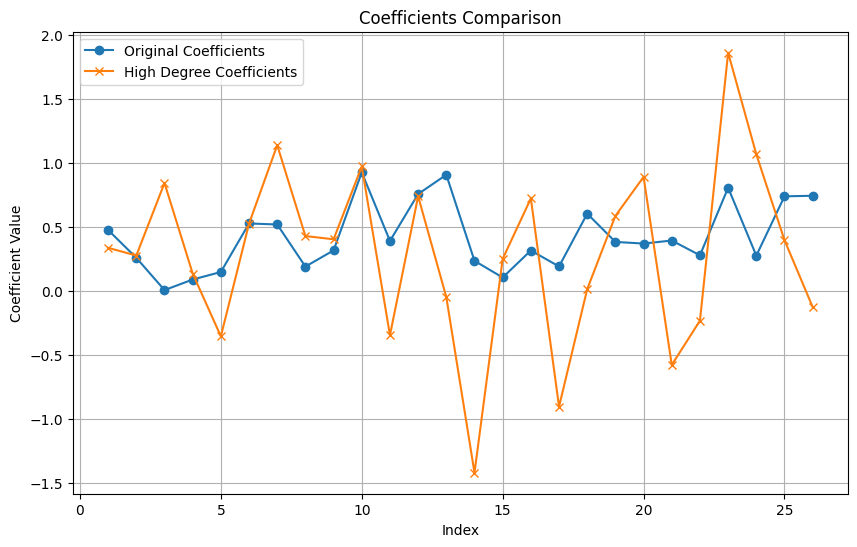

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



class PolynomialGradientDescent:
    def __init__(self, degree, learning_rate=0.01, max_iter=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coefficients = np.random.randn(degree + 1)

    def predict(self, x):
        return sum(coef * x**i for i, coef in enumerate(self.coefficients))

    def compute_gradient(self, x, y):
        predictions = self.predict(x)
        errors = predictions - y
        gradients = [2 * np.mean(errors * x**i) for i in range(self.degree + 1)]
        return np.array(gradients)

    def fit(self, X, y):
        for _ in range(self.max_iter):
            gradients = self.compute_gradient(X, y)
            self.coefficients -= self.learning_rate * gradients

    def coefficients(self):
        return self.coefficients
    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(errors**2)
        return mse

def find_best_degree(X_train, y_train, X_test, y_test, max_degree, learning_rate=0.01, max_iter=1000):
    degrees = []
    mse_values = []
    best_coefficients = []
    best_degree = None
    best_mse = float('inf')

    for degree in range(1, max_degree + 1):
        model = PolynomialGradientDescent(degree, learning_rate, max_iter)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = np.mean((y_pred - y_test) ** 2)

        degrees.append(degree)
        mse_values.append(mse)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_coefficients = model.coefficients

    return best_degree, best_mse, degrees, mse_values,best_coefficients


def plot_graph(origCoeffs, highDegree_coefficients, n):
    indices = list(range(1, n+1))

    plt.figure(figsize=(10, 6))
    plt.plot(indices, origCoeffs, label='Original Coefficients', marker='o')
    plt.plot(indices, highDegree_coefficients, label='High Degree Coefficients', marker='x')

    plt.title('Coefficients Comparison')
    plt.xlabel('Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_graph_mseVsDegree(degrees, mse_values):
    plt.plot(degrees, mse_values, marker='o')
    plt.title('MSE vs. Degree of Polynomial')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.xticks(degrees)
    plt.grid(True)
    plt.show()


X_train, X_test, y_train, y_test = train_test_split( predictor,response, test_size=0.3, random_state=42)

best_degree, best_mse, degrees, mse_values,best_coefficients = find_best_degree(X_train, y_train, X_test, y_test, max_degree=25)




plot_graph_mseVsDegree(degrees, mse_values)

print("Best Degree:", best_degree)
print("Best MSE:", best_mse)



model = PolynomialGradientDescent(best_degree)
model.fit(X_train, y_train)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Training Data')

X_test_pred = np.linspace(np.min(X_test), np.max(X_test), 100)
y_test_pred = model.predict(X_test_pred)
plt.plot(X_test_pred, y_test_pred, color='red', label='Polynomial Regression')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()





model2 = PolynomialGradientDescent(degree=25)
model2.fit(X_train, y_train)
highDegree_coefficients = model2.coefficients
print(np.array(origCoeffs).shape)
print(np.array(highDegree_coefficients).shape)
plot_graph(origCoeffs, highDegree_coefficients,n=26)


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

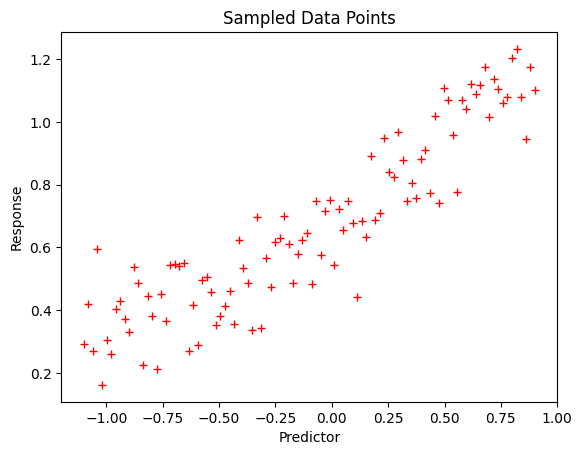

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()


X_train, X_test, y_train, y_test = train_test_split( predictor_low,response_low, test_size=0.3, random_state=42)


0.02103698254613383


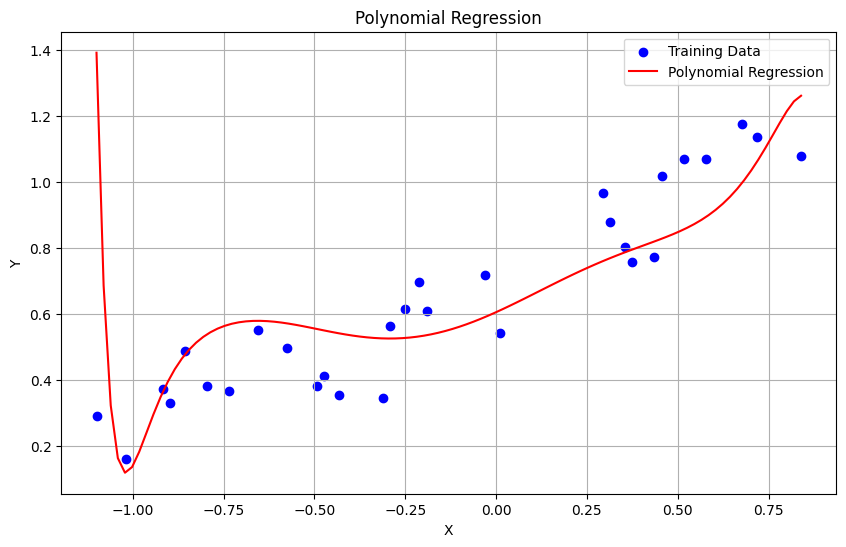

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


consid_degree = 25
constCoeff  = np.random.randn(consid_degree + 1)


class PolynomialGradientDescent:
    def __init__(self, degree, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.degree = degree
    def predict(self, x):
        return sum(coef * x**i for i, coef in enumerate(self.coefficients))

    def derivative(self, x, y):
        predictions = self.predict(x)
        errors = predictions - y
        gradients = []
        for i in range(self.degree + 1):
            powval = np.power(x, i)
            meanComponent = np.mean(errors * powval)
            gradient = 2 * meanComponent
            gradients.append(gradient)
        gradients_array = np.array(gradients)
        return gradients_array


    def fit(self, X, y):
        self.coefficients = constCoeff
        for _ in range(self.max_iter):
            gradients = self.derivative(X, y)
            self.coefficients -= self.learning_rate * gradients

    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(np.power(errors, 2))
        return mse



model = PolynomialGradientDescent(consid_degree)
model.fit(X_train, y_train)
print(model.mean_square_error(X_train, y_train))



plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Training Data')

X_test_pred = np.linspace(np.min(X_test), np.max(X_test), 100)
y_test_pred = model.predict(X_test_pred)
plt.plot(X_test_pred, y_test_pred, color='red', label='Polynomial Regression')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

0.013299977271701614


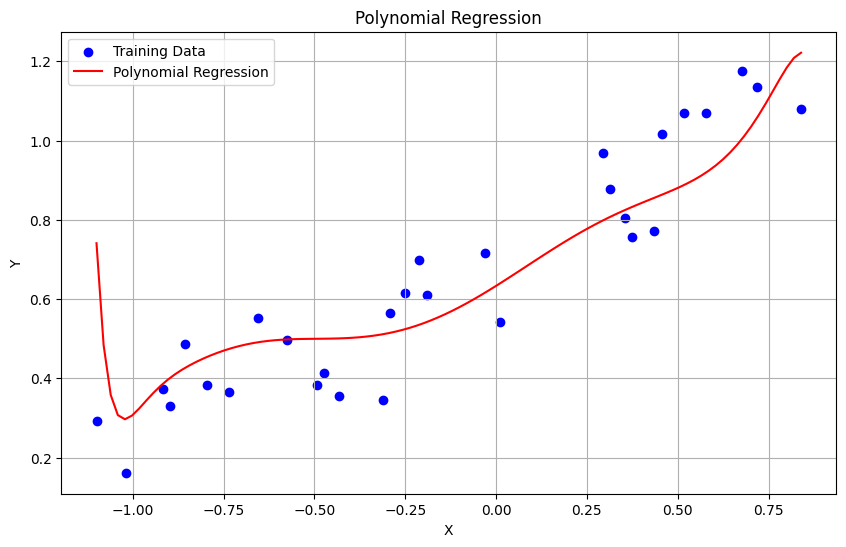

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


class PolynomialGradientDescentLasso:
    def __init__(self, degree, learning_rate=0.01, max_iter=1000, lambdaval=0.01):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.degree = degree
        self.lambdaval = lambdaval
    def predict(self, x):
        return sum(coef * x**i for i, coef in enumerate(self.coefficients))

    def derivative(self, x, y):
        predictions = self.predict(x)
        errors = predictions - y
        gradients = []
        for i in range(self.degree + 1):
            powval = np.power(x, i)
            meanComponent = np.mean(errors * powval)
            gradient = 2 * meanComponent
            gradients.append(gradient)
        gradients_array = np.array(gradients)
        lasso_gradients = np.sign(self.coefficients) * self.lambdaval
        lasso_gradients[0] = 0
        return gradients_array + lasso_gradients


    def fit(self, X, y):
        self.coefficients = constCoeff
        for _ in range(self.max_iter):
            gradients = self.derivative(X, y)
            self.coefficients -= self.learning_rate * gradients

    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(np.power(errors, 2))
        return mse





model = PolynomialGradientDescentLasso(consid_degree)
model.fit(X_train, y_train)
print(model.mean_square_error(X_train, y_train))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Training Data')

X_test_pred = np.linspace(np.min(X_test), np.max(X_test), 100)
y_test_pred = model.predict(X_test_pred)
plt.plot(X_test_pred, y_test_pred, color='red', label='Polynomial Regression')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

0.012006941573659662


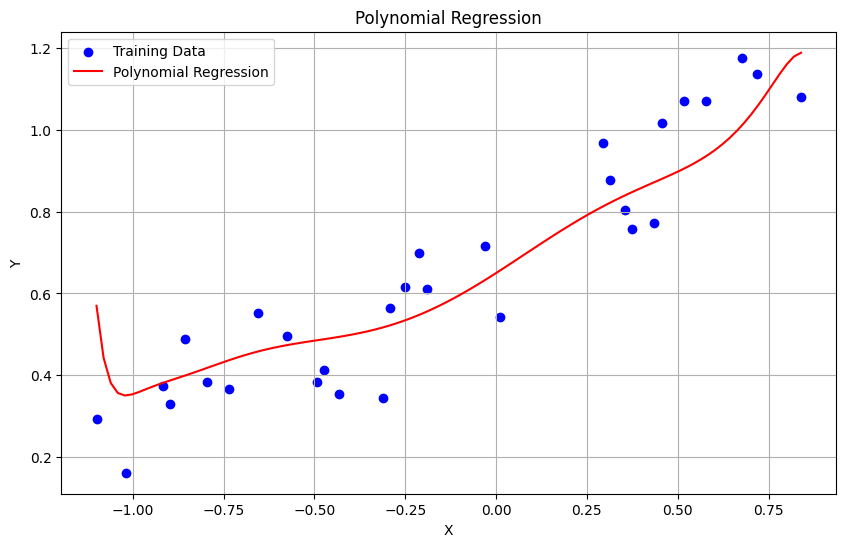

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



class PolynomialGradientDescentRidge:
    def __init__(self, degree, learning_rate=0.01, max_iter=1000, lambdaval=0.01):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.degree = degree
        self.lambdaval = lambdaval
    def predict(self, x):
        return sum(coef * x**i for i, coef in enumerate(self.coefficients))

    def derivative(self, x, y):
        predictions = self.predict(x)
        errors = predictions - y
        gradients = []
        for i in range(self.degree + 1):
            powval = np.power(x, i)
            meanComponent = np.mean(errors * powval)
            gradient = 2 * meanComponent
            gradients.append(gradient)
        gradients_array = np.array(gradients)
        ridge_term = 2 * self.lambdaval * np.array([0] + list(self.coefficients[1:]))
        return gradients_array + ridge_term


    def fit(self, X, y):
        self.coefficients = constCoeff
        for _ in range(self.max_iter):
            gradients = self.derivative(X, y)
            self.coefficients -= self.learning_rate * gradients

    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(np.power(errors, 2))
        return mse



model = PolynomialGradientDescentRidge(consid_degree)
model.fit(X_train, y_train)
print(model.mean_square_error(X_train, y_train))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Training Data')

X_test_pred = np.linspace(np.min(X_test), np.max(X_test), 100)
y_test_pred = model.predict(X_test_pred)
plt.plot(X_test_pred, y_test_pred, color='red', label='Polynomial Regression')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

Lasso and ridge results in lower MSE

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


class MultipleLinearRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coefficients = None
        self.bias = None

    def predict(self, X):
        mainPredict = np.dot(X, self.coefficients)
        totPredict = mainPredict + self.bias
        return  totPredict

    def derivative(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        N =  X.shape[0]
        TwoByN = 2 / N
        gradient = TwoByN * np.dot(X.T, errors)
        bias_gradient = 2 * errors.mean()
        return gradient, bias_gradient

    def fit(self, X, y):
        noOfCoeff = X.shape[1]
        self.coefficients = np.random.randn(noOfCoeff)
        self.bias = np.random.randn()
        for _ in range(self.max_iter):
            gradient, bias_gradient = self.derivative(X, y)
            self.coefficients = self.coefficients -  (self.learning_rate * gradient)
            self.bias =  self.bias - (self.learning_rate * bias_gradient)

    def get_coefficients(self):
        return self.coefficients, self.bias

    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(errors**2)
        return mse




def plot_regression_for_feature(X, y, model, feature_index, feature_name):
    plt.scatter(X[:, feature_index], y, label="Actual")
    plt.plot(X[:, feature_index], model.predict(X), color='red', label="Predicted")
    plt.xlabel(feature_name)
    plt.ylabel("Balance")
    plt.legend()
    plt.title(f"Multiple Linear Regression with {feature_name}")
    plt.show()



def recursive_feature_elimination(X, y, feature_names):
    remaining_features = list(feature_names)
    last_mse = np.inf


    min_mse = np.inf
    feature_to_remove = None
    feature_index_to_remove = None

    for i, feature in enumerate(remaining_features):
        X_temp = np.delete(X, i, axis=1)

        model = MultipleLinearRegressionGD(learning_rate=0.015, max_iter=10000)
        model.fit(X_temp, y)
        mse = model.mean_square_error(X_temp, y)
        print(f" Test mse with {feature}  deleted  is : {mse}")


def run_MultipleLinearRegressionGD(train_X, train_y, test_X, test_y, model):
    model.fit(train_X, train_y)
    coefficients, bias = model.get_coefficients()
    print("Coefficients:", coefficients)
    print("Bias:", bias)

    train_mse = model.mean_square_error(train_X, train_y)
    print("Train Mean Squared Error:", train_mse)

    test_mse = model.mean_square_error(test_X, test_y)
    print("Test Mean Squared Error:", test_mse)

    return coefficients, bias, train_mse, test_mse

data = pd.read_csv("credit.csv")
features = ["Income", "Limit", "Rating", "Cards", "Age", "Education"]
target = "Balance"

X = data[features].values
y = data[target].values

mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

X_normalized = (X - mean_X) / std_X

train_X, test_X, train_y, test_y = train_test_split(X_normalized, y, test_size=0.2, random_state=42)



model = MultipleLinearRegressionGD(learning_rate=0.015, max_iter=10000)
coefficients, bias, train_mse, test_mse = run_MultipleLinearRegressionGD(train_X, train_y, test_X, test_y, model)

feature_index = 0
feature_name = features[feature_index]

print()
recursive_feature_elimination(test_X, test_y, features)



Coefficients: [-256.85100786  343.06429599  257.02291914   21.32739964  -15.79115476
    6.95445713]
Bias: 522.5049872250705
Train Mean Squared Error: 24750.075092535502
Test Mean Squared Error: 29656.612722502272

 Test mse with Income  deleted  is : 62738.31816564342
 Test mse with Limit  deleted  is : 27908.31505382865
 Test mse with Rating  deleted  is : 29831.176733071217
 Test mse with Cards  deleted  is : 28045.177900120158
 Test mse with Age  deleted  is : 28296.783062601055
 Test mse with Education  deleted  is : 28069.01131802475


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data['Rating_Age_Interaction'] = data['Rating'] * data['Age']

extended_features = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Rating_Age_Interaction"]
target = "Balance"

X = data[extended_features]
y = data[target].values

mean_X = X.mean()
std_X = X.std()
X_standardized = (X - mean_X) / std_X

train_X, test_X, train_y, test_y = train_test_split(X_standardized, y, test_size=0.2, random_state=42)



X_standardized_with_intercept = sm.add_constant(test_X)

model = sm.OLS(test_y, X_standardized_with_intercept)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     53.45
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           5.22e-26
Time:                        11:03:41   Log-Likelihood:                -521.60
No. Observations:                  80   AIC:                             1059.
Df Residuals:                      72   BIC:                             1078.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    511

Removing Limits, Card, Age , Education reduces MSQ ,also P values are higher than rest.
Age is kind of fine, but the rest are not neccessary.

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class MultipleLinearRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coefficients = None
        self.bias = None

    def predict(self, X):
        mainPredict = np.dot(X, self.coefficients)
        totPredict = mainPredict + self.bias
        return  totPredict

    def derivative(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        N =  X.shape[0]
        TwoByN = 2 / N
        gradient = TwoByN * np.dot(X.T, errors)
        bias_gradient = 2 * errors.mean()
        return gradient, bias_gradient

    def fit(self, X, y):
        noOfCoeff = X.shape[1]
        self.coefficients = np.random.randn(noOfCoeff)
        self.bias = np.random.randn()
        for _ in range(self.max_iter):
            gradient, bias_gradient = self.derivative(X, y)
            self.coefficients = self.coefficients -  (self.learning_rate * gradient)
            self.bias =  self.bias - (self.learning_rate * bias_gradient)

    def get_coefficients(self):
        return self.coefficients, self.bias

    def mean_square_error(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        mse = np.mean(errors**2)
        return mse


sharks = pd.read_csv('shark_attacks.csv')

X = sharks[['IceCreamSales', 'Temperature', 'Month', 'Year']]
y = sharks['SharkAttacks']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultipleLinearRegressionGD()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MSE with ice cream: ", model.mean_square_error(X_test, y_test))

# feature = 'Temperature'
# feature_data = X_test[feature]
# actual_data = y_test

# plt.figure(figsize=(10, 6))
# plt.scatter(feature_data, actual_data, color='blue', label='Actual data')
# plt.scatter(feature_data, predictions, color='red', label='Predicted data')

# sorted_order = np.argsort(feature_data)
# plt.plot(feature_data.iloc[sorted_order], predictions[sorted_order], color='green', label='Regression Line')

# plt.title(f'Shark Attacks vs {feature}')
# plt.xlabel(feature)
# plt.ylabel('Shark Attacks')
# plt.legend()
# plt.show()




# fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(18, 6))

# for i, feature in enumerate(X.columns):
#     feature_data = X_test[feature]
#     actual_data = y_test

#     axes[i].scatter(feature_data, actual_data, color='blue', label='Actual data')

#     axes[i].scatter(feature_data, predictions, color='red', label='Predicted data')

#     sorted_order = np.argsort(feature_data)
#     axes[i].plot(feature_data.iloc[sorted_order], predictions[sorted_order], color='green', label='Regression Line')

#     axes[i].set_title(f'Shark Attacks vs {feature}')
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Shark Attacks')
#     axes[i].legend()

# plt.tight_layout()
# plt.show()

MSE with ice cream:  37.68058332055288


In [ ]:

sharks = pd.read_csv('shark_attacks.csv')

columns_of_interest = ["Year","Month","SharkAttacks","Temperature","IceCreamSales"]
X = sharks[['Temperature', 'Month', 'Year']]
y = sharks['SharkAttacks']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultipleLinearRegressionGD()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MSE without ice cream: ", model.mean_square_error(X_test, y_test))

# feature = 'Temperature'
# feature_data = X_test[feature]
# actual_data = y_test

# plt.figure(figsize=(10, 6))
# plt.scatter(feature_data, actual_data, color='blue', label='Actual data')
# plt.scatter(feature_data, predictions, color='red', label='Predicted data')

# sorted_order = np.argsort(feature_data)
# plt.plot(feature_data.iloc[sorted_order], predictions[sorted_order], color='green', label='Regression Line')

# plt.title(f'Shark Attacks vs {feature}')
# plt.xlabel(feature)
# plt.ylabel('Shark Attacks')
# plt.legend()
# plt.show()



# fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(18, 6))

# for i, feature in enumerate(X.columns):
#     feature_data = X_test[feature]
#     actual_data = y_test

#     axes[i].scatter(feature_data, actual_data, color='blue', label='Actual data')

#     axes[i].scatter(feature_data, predictions, color='red', label='Predicted data')

#     sorted_order = np.argsort(feature_data)
#     axes[i].plot(feature_data.iloc[sorted_order], predictions[sorted_order], color='green', label='Regression Line')

#     axes[i].set_title(f'Shark Attacks vs {feature}')
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Shark Attacks')
#     axes[i].legend()

# plt.tight_layout()
# plt.show()

MSE without ice cream:  43.38131997546162


MSE with out ice cream is higher, But Still we know that logically increase in ice cream sales will not increase shark attacks, but still there is a correlation and it increased. So correlation does not imply causation, means: just because two variables or data points are correlated, meaning they tend to change together or show a statistical relationship, it does not necessarily mean that one variable is causing the other to change